In [62]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/filter-visualization"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/filter-visualization


# Resnet Model
ResNet (short for "Residual Network") is a deep learning architecture that was introduced in 2015. It is a type of CNN that is designed to address the problem of vanishing gradients, which can occur when training very deep neural networks.

The basic building block of ResNet is the residual block, which allows the network to learn residual functions instead of directly learning the desired underlying mapping. This is achieved by adding shortcut connections between layers, which allows the network to skip over some of the layers and propagate information more easily.

ResNet has several variants, including ResNet-18, ResNet-34, ResNet-50, ResNet-101, and ResNet-152, which differ in the number of layers and the overall architecture of the network.

One of the main advantages of ResNet is that it allows for the training of very deep neural networks, which can lead to better accuracy on complex tasks. 

## Architecture
ResNet-50 is a variant of the ResNet architecture that consists of 50 layers. It includes a series of convolutional layers, followed by several residual blocks. Each residual block consists of two convolutional layers and a shortcut connection that allows the network to skip over some of the layers. The network also includes a global average pooling layer and a fully connected output layer for classification.

In [38]:
from keras.applications.resnet import ResNet50
from matplotlib import pyplot

model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [39]:
model.layers[2].get_weights()
model.layers[2]

In [40]:
conv_layers = []

# Iterate through the layers of the model and add each convolutional layer to the list
for layer in model.layers:
    if '_conv' in layer.name:
        conv_layers.append(layer)
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

conv1_conv (7, 7, 3, 64)
conv2_block1_1_conv (1, 1, 64, 64)
conv2_block1_2_conv (3, 3, 64, 64)
conv2_block1_0_conv (1, 1, 64, 256)
conv2_block1_3_conv (1, 1, 64, 256)
conv2_block2_1_conv (1, 1, 256, 64)
conv2_block2_2_conv (3, 3, 64, 64)
conv2_block2_3_conv (1, 1, 64, 256)
conv2_block3_1_conv (1, 1, 256, 64)
conv2_block3_2_conv (3, 3, 64, 64)
conv2_block3_3_conv (1, 1, 64, 256)
conv3_block1_1_conv (1, 1, 256, 128)
conv3_block1_2_conv (3, 3, 128, 128)
conv3_block1_0_conv (1, 1, 256, 512)
conv3_block1_3_conv (1, 1, 128, 512)
conv3_block2_1_conv (1, 1, 512, 128)
conv3_block2_2_conv (3, 3, 128, 128)
conv3_block2_3_conv (1, 1, 128, 512)
conv3_block3_1_conv (1, 1, 512, 128)
conv3_block3_2_conv (3, 3, 128, 128)
conv3_block3_3_conv (1, 1, 128, 512)
conv3_block4_1_conv (1, 1, 512, 128)
conv3_block4_2_conv (3, 3, 128, 128)
conv3_block4_3_conv (1, 1, 128, 512)
conv4_block1_1_conv (1, 1, 512, 256)
conv4_block1_2_conv (3, 3, 256, 256)
conv4_block1_0_conv (1, 1, 512, 1024)
conv4_block1_3_conv (1, 1,

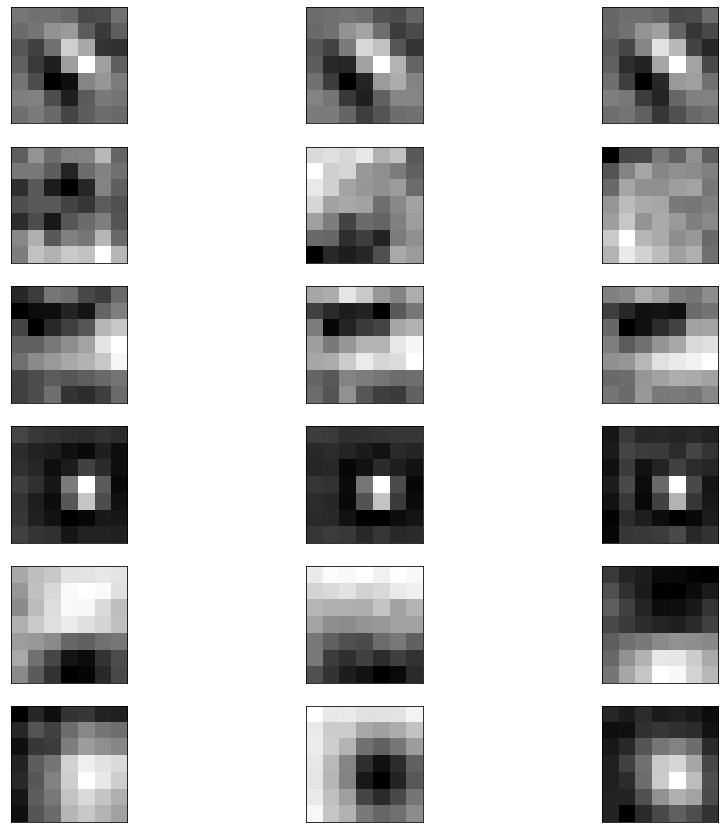

In [41]:
filters, biases = model.layers[2].get_weights() # conv1_conv (Conv2D)  
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
fig = pyplot.figure(figsize=(15, 15))
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
  ax = pyplot.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

In [51]:
for i in range(len(model.layers)):
 layer = model.layers[i]
 # check for convolutional layer
 if '_conv' not in layer.name:
  continue
 # summarize output shape
 print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

In [54]:
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[2].output)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv1_conv (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 64ms/step


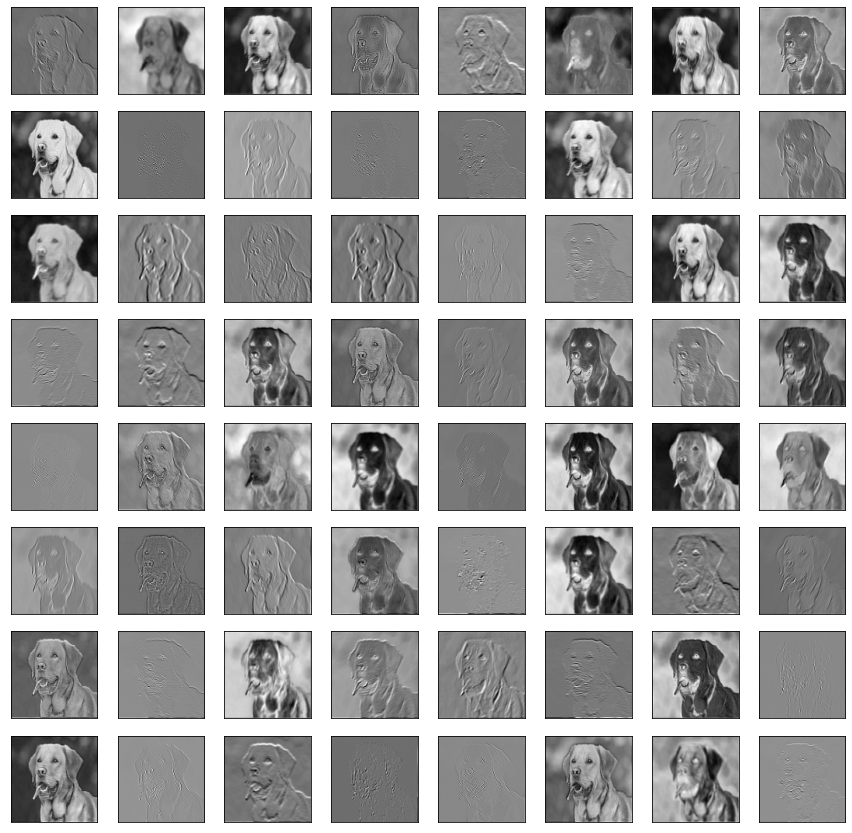

In [67]:
# plot feature map of first conv layer for given image
from keras.applications.resnet import preprocess_input
# from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = ResNet50()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
model.summary()
# load the image with the required shape
img = load_img('dog.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
fig = pyplot.figure(figsize=(15, 15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

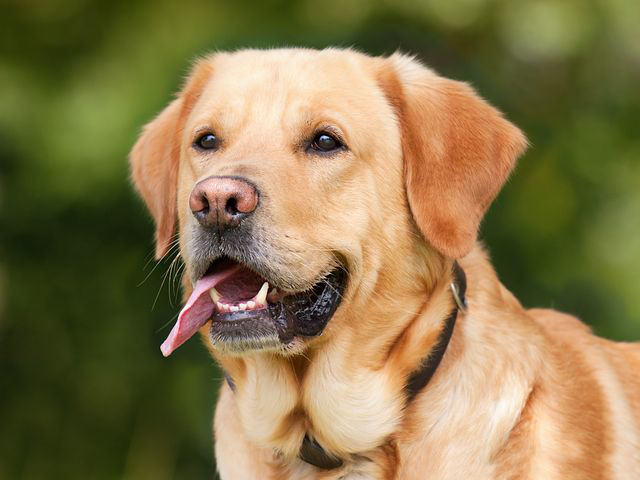

In [68]:
# load the image
img = load_img('dog.jpg')

# display the image (optional)
img.show()

1/1 [==============================] - 2s 2s/step


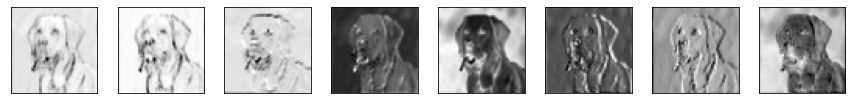

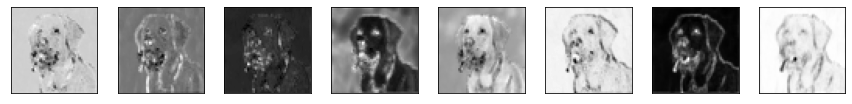

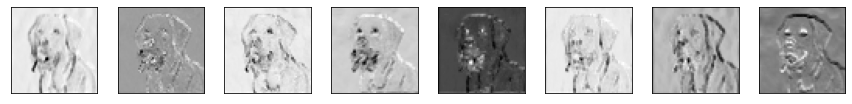

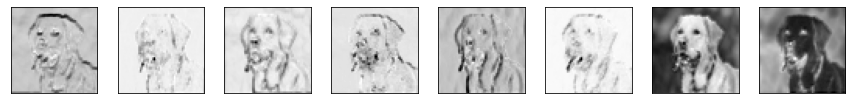

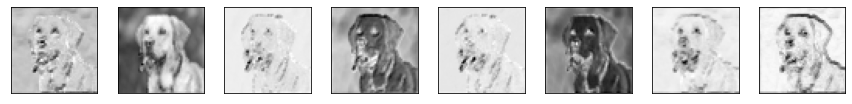

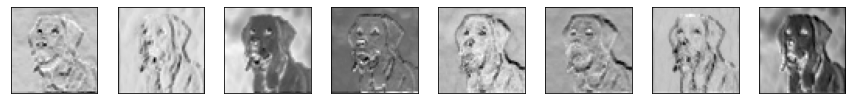

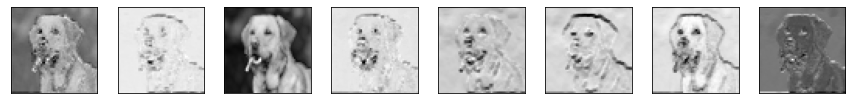

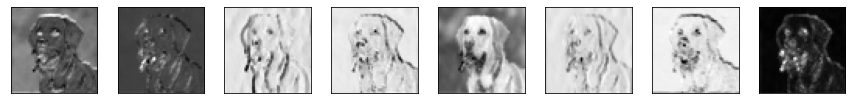

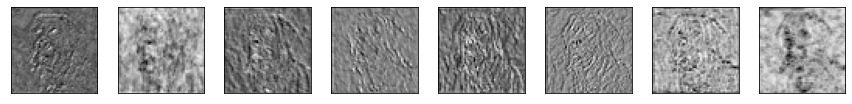

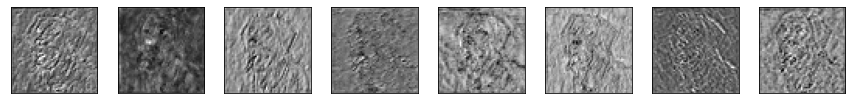

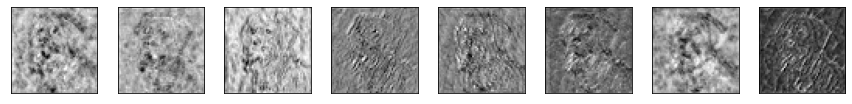

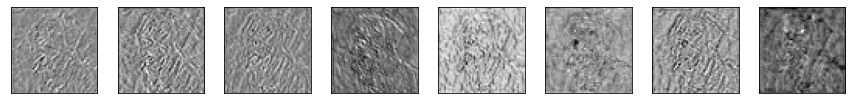

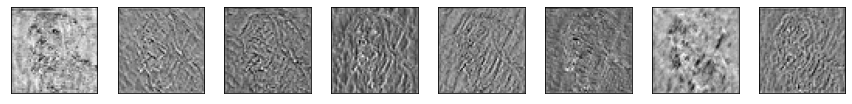

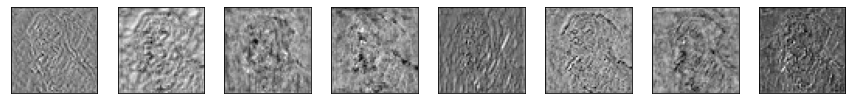

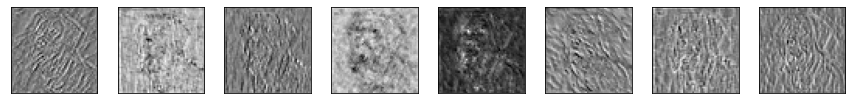

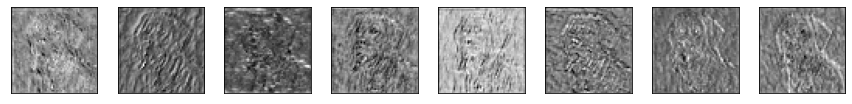

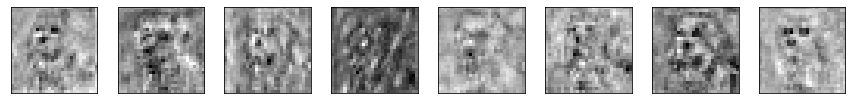

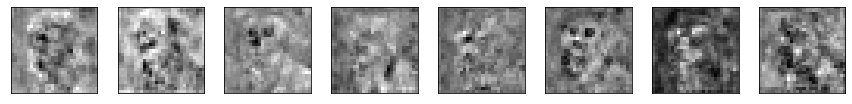

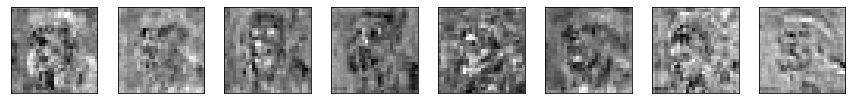

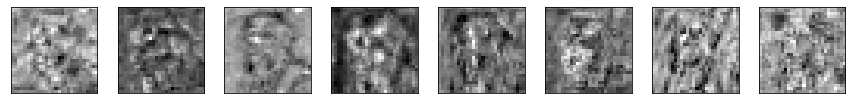

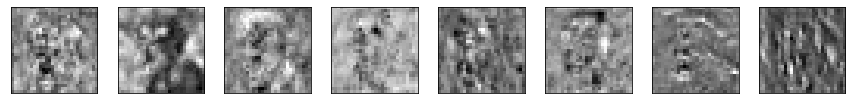

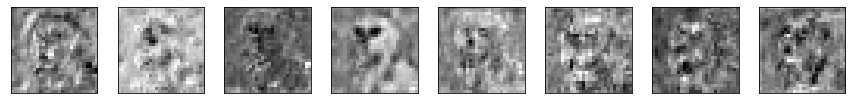

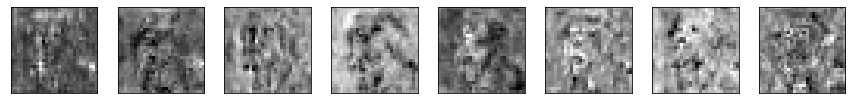

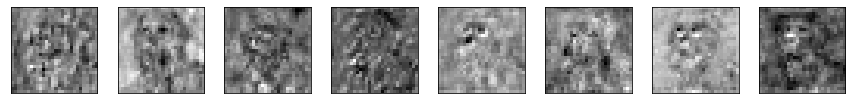

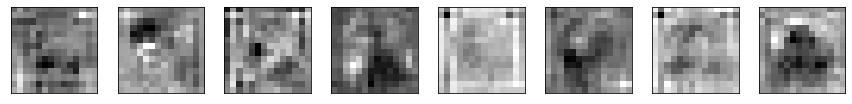

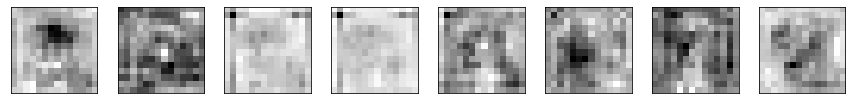

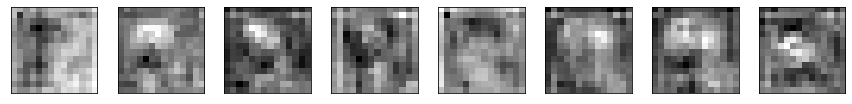

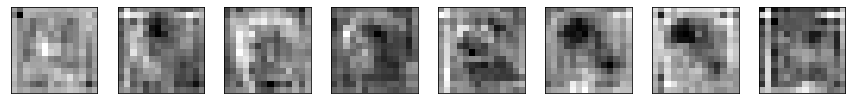

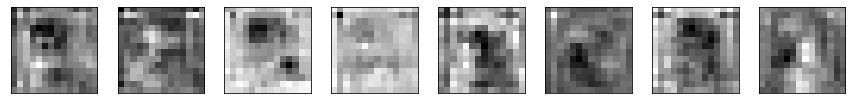

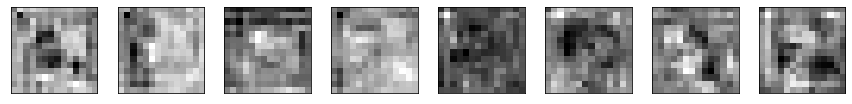

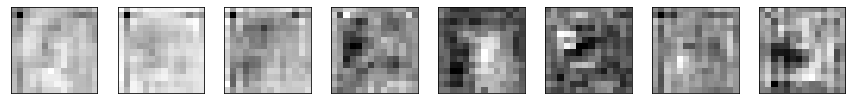

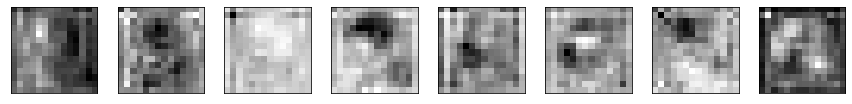

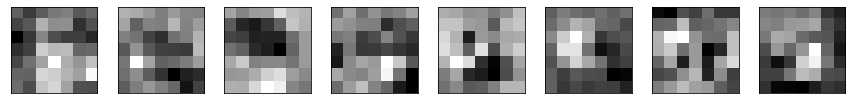

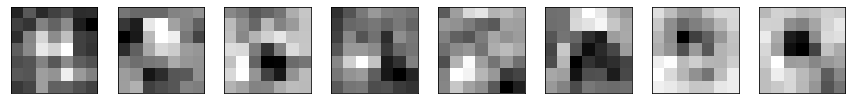

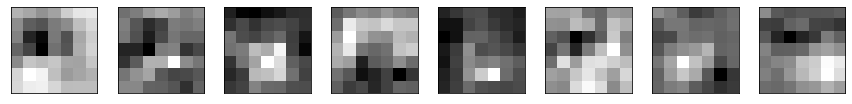

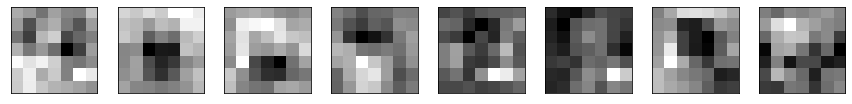

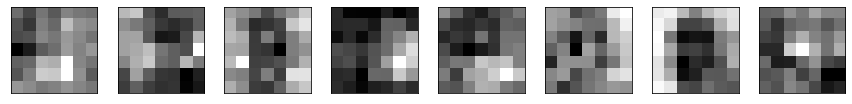

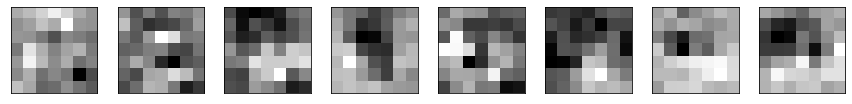

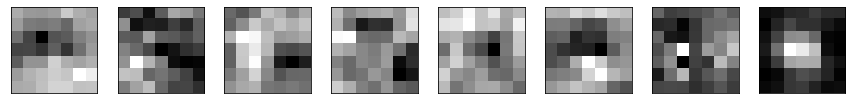

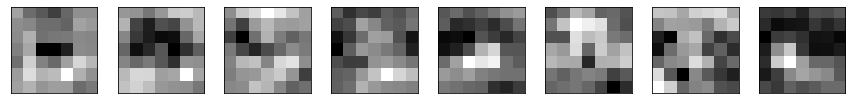

In [95]:

# load the model
model = ResNet50(weights='imagenet')
# redefine model to output right after the first hidden layer
ixs = [7,35,77,139,171]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('dog.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		fig = pyplot.figure(figsize=(15, 15))
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()
	